In [1]:
import pandas as pd

df = pd.read_csv('data/celeba/list_attr_celeba.csv')

In [ ]:
import os 
from PIL import Image
from torch.utils.data import Dataset
import pandas as pd


class CelebAGenderDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        attr_path = os.path.join(root_dir, 'list_attr_celeba.csv')
        if not os.path.exists(attr_path):
            raise FileNotFoundError(f"Attribute file not found at {attr_path}")
        
        self.attr_df = pd.read_csv(attr_path)
        self.records = []
        for _, row in self.attr_df.iterrows():
            fname = row['image_id']
            label = row['Male']
            if label == -1:
                label = 0
            self.records.append((fname,label))

    def __len__(self):
        return len(self.records)
    
    def __getitem__(self, idx):
        fname, label = self.records[idx]
        img_path = os.path.join(self.root_dir, 'img_align_celeba', fname)
        
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        return image, label


In [1]:
import os 
from PIL import Image
from torch.utils.data import Dataset
import pandas as pd


class CelebAGenderDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        attr_path = os.path.join(root_dir, 'list_attr_celeba.csv')
        if not os.path.exists(attr_path):
            raise FileNotFoundError(f"Attribute file not found at {attr_path}")
        
        self.attr_df = pd.read_csv(attr_path)
        self.attr_df.columns = self.attr_df.columns.str.strip()

        self.attr_df = self.attr_df[['image_id', 'Male']]

        # Convert labels: 1 = male, -1 = female
        self.attr_df['Male'] = (self.attr_df['Male'] == 1).astype(int)

        self.records = list(zip(self.attr_df['image_id'], self.attr_df['Male']))


    def __len__(self):
        return len(self.records)
    
    def __getitem__(self, idx):
        fname, label = self.records[idx]
        img_path = os.path.join(self.root_dir, 'img_align_celeba', fname)
        
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        return image, label


In [4]:
# c.records[:5]  # Display the first 5 records to verify the dataset loading
from torchvision import transforms
    
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

root_dir = 'data/celeba'
dataset = CelebAGenderDataset(root_dir=root_dir, transform=transform)

img, label = dataset[2]
print(img.shape, label)

torch.Size([3, 128, 128]) 1


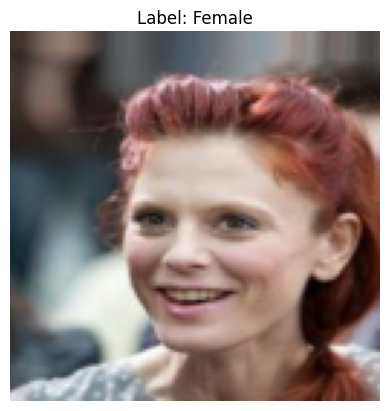

In [20]:
import matplotlib.pyplot as plt

# Pick an index to view
idx = 1
img, label = dataset[idx]

# If you used transforms.ToTensor(), convert back to NumPy for display
if hasattr(img, "permute"):  # tensor case
    img_np = img.permute(1, 2, 0).numpy()
else:  # PIL image case
    img_np = img

plt.imshow(img_np)
plt.title(f"Label: {'Male' if label == 1 else 'Female'}")
plt.axis('off')
plt.show()


In [ ]:
df = pd.read_csv('data/celeba/list_attr_celeba.csv')

df['image_id']

0         000001.jpg
1         000002.jpg
2         000003.jpg
3         000004.jpg
4         000005.jpg
             ...    
202594    202595.jpg
202595    202596.jpg
202596    202597.jpg
202597    202598.jpg
202598    202599.jpg
Name: image_id, Length: 202599, dtype: object